# Reference

The data set has been taken from [Datset](https://drive.google.com/drive/folders/1phqosmJ8a4WF9M8rcGVEC5ssB3KBUm1i?usp=share_link)

The following link has been used for reference [Site](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_random_walker_segmentation.html)

# Read Me

There are two zip files that need to be added before running below snippets. Zip files need to be added in the content directory.

# Assumptions

There are total 10 different images. 
Many assumptions have been made.
1. In weights formula, beta = 1
2. To mark nodes any pixel with value greater than 110 has been marked 255 and pixel with value less than 75 has been set 0.
3. In skitlean binary image has been made and all pixels are either 0 or 255

Accuracy for an image is defined as (delta white pixels)/total pixels X 100

Lastly all the images has been resized by FACTOR to make computations faster.

In [2]:
# Run this file to unzip the uploaded dataset
import zipfile
with zipfile.ZipFile("a4.zip","r") as zip_ref:
    zip_ref.extractall()

In [3]:
# importiting utilities
import os, glob                       # creating, removing, fetching, changing, identifying cur directory  
from sklearn import preprocessing     # contains efficient tools for machine learning and statistical modeling 
import cv2                            # to read an load image
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# setting path to the dataset
dataset_path = os.getcwd() + '/a4_data/'


# Scikit Learn
The inbuilt scikit learn function has been implemeneted. The black and white is an array that contains number of black and white pixels in each image.

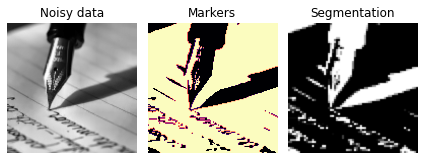

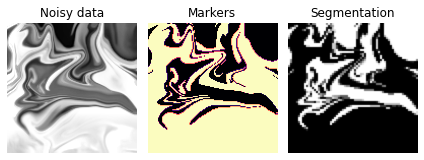

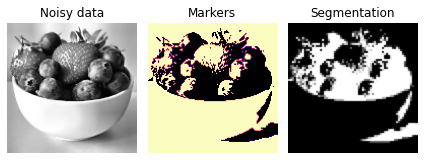

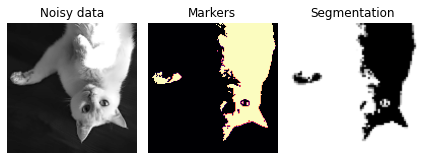

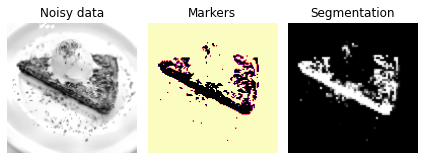

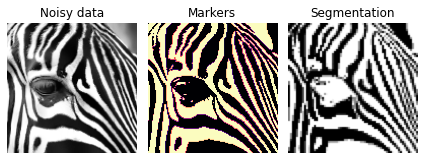

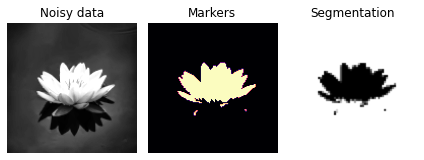

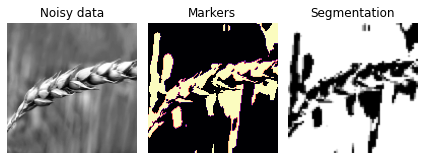

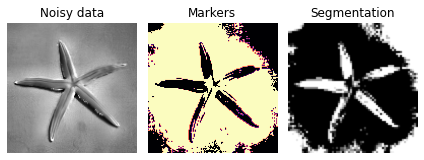

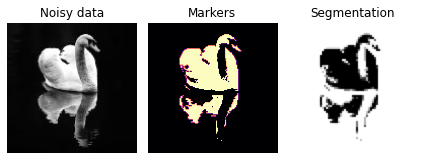

In [72]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
from skimage import  io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import  exposure
import skimage

rng = np.random.default_rng()
black=[]
white=[]


for images in glob.glob(dataset_path + '/**', recursive=True):
  if images[-3:] == 'png':
    # Noisy data
    img = img_as_float(cv2.imread(images,0))
    sigmaEst = np.mean(estimate_sigma(img, multichannel=True))
    pathKW = dict(patch_size=5,
                  patch_distance=6,
                  multichannel=True)

    denoiseImg = denoise_nl_means(img, h=1.15*sigmaEst, fast_mode=True, **pathKW)
    data = exposure.equalize_adapthist(denoiseImg)

    # The range of the binary image spans over (-1, 1).
    # We choose the hottest and the coldest pixels as markers.
    markers = np.zeros(data.shape, dtype=np.uint)
    markers[data < -0.5] = 0
    markers[data > 0.5] = 255

    # Run random walker algorithm
    labels = random_walker(data, markers, beta=10, mode='bf')

    # Plot results
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    out=labels/255.0
    out=cv2.resize(out, (int(out.shape[1]*0.5)+1,int(out.shape[0]*0.5)+1))
    countb = 0
    countw = 0
    for i in range(out.shape[0]):
       for j in range(out.shape[1]):
         if(out[i][j]*255<2):
           countb = countb+1
         else:
           countw = countw+1
    
    black.append(countb)
    white.append(countw)
    ax1.imshow(data, cmap='gray')
    ax1.axis('off')
    ax1.set_title('Noisy data')
    ax2.imshow(markers, cmap='magma')
    ax2.axis('off')
    ax2.set_title('Markers')
    plt.imshow(out,cmap='gray')
    ax3.axis('off')
    ax3.set_title('Segmentation')
    fig.tight_layout()
    plt.show()

    

# Random Walker Algorithm
Lu * X = -(B)T.M
1. Calculation of Lu
2. Calculation of B
3. Calculation of M
4. Calulation of Lu inverse
5. Calulation of X
6. Making the new image from X
6. Calculation of accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: overflow encountered in ubyte_scalars


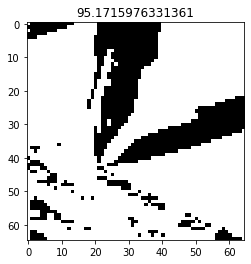

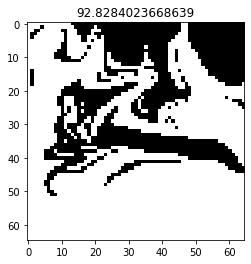

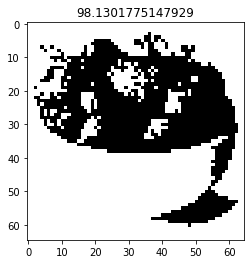

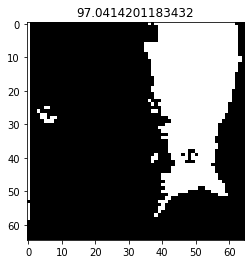

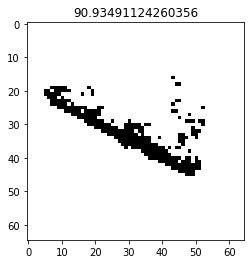

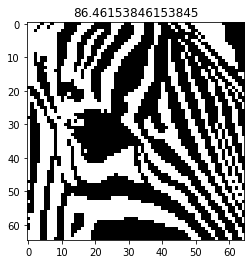

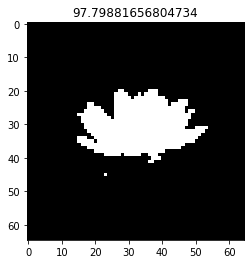

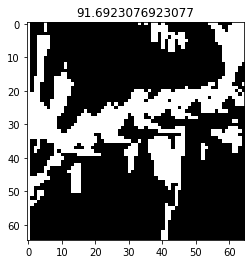

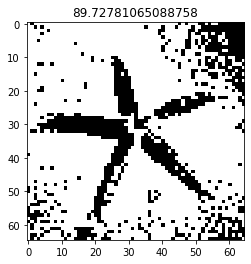

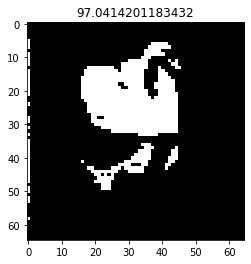

In [73]:
from PIL import Image
beta = 1
FACTOR = 0.5
x =[1,0,-1]
y =[1,0,-1]
wh = []
bl = []
count=0
for images in glob.glob(dataset_path + '/**', recursive=True):
  if images[-3:] == 'png':
    img = cv2.imread(images, 0)
    
    imgOriginal=np.array(img)
    img_matrix=img/255.0
    img_matrix=cv2.resize(img, (int(img.shape[1]*FACTOR)+1,int(img.shape[0]*FACTOR)+1))

    size = img_matrix.shape[0]*img_matrix.shape[1]
    new_image = np.zeros((img_matrix.shape[0], img_matrix.shape[1]) ,dtype='float64') 
    marked=[]
    unmarked=[]
    for i in range(size):
        px = i//img_matrix.shape[0]
        py = i%img_matrix.shape[0]
        if(img_matrix[px][py]>=110):
          marked.append([i,1])
          new_image[px][py] = 255   
        elif(img_matrix[px][py]<=75):
          marked.append([i,0])
        else:
          unmarked.append([i,0])
    um_size = len(unmarked)
    m_size = len(marked)
    Lu = np.zeros((um_size,um_size))
    BT = np.zeros((um_size,m_size))
    M0 = np.zeros(m_size)
    M255 = np.zeros(m_size)

    
    # preparing Lu
    for i in range(um_size):
      for j in range(um_size):
        px = unmarked[i][0]//img_matrix.shape[0]
        py = unmarked[i][0]%img_matrix.shape[0]
        qx = unmarked[j][0]//img_matrix.shape[0]
        qy = unmarked[j][0]%img_matrix.shape[0]
        if(unmarked[i][0]==unmarked[j][0]):
          dp = -math.exp(-beta*abs(img_matrix[px][py]-img_matrix[qx][qy]))  
          for a in range(3):
            for b in range(3):
              x_new=px+x[a]
              y_new=px+y[b]
              if(x_new>=0 and x_new<img_matrix.shape[0] and y_new>=0 and y_new<img_matrix.shape[1]):
                dp = dp + math.exp(-beta*abs(img_matrix[px][py]-img_matrix[x_new][y_new]))  
          Lu[i][j] = dp      
        elif(abs(px-qx)<=1 or abs(py-qy)<=1):
          Lu[i][j] = -math.exp(-beta*abs(img_matrix[px][py]-img_matrix[qx][qy]))  
        else:
          Lu[i][j] = 0

    # preparing (B)T matrix
    for i in range(um_size):
      for j in range(m_size):
        px = unmarked[i][0]//img_matrix.shape[0]
        py = unmarked[i][0]%img_matrix.shape[0]
        qx = marked[j][0]//img_matrix.shape[0]
        qy = marked[j][0]%img_matrix.shape[0]
        if(unmarked[i][0]==marked[j][0]):
          dp = -math.exp(-beta*abs(img_matrix[px][py]-img_matrix[qx][qy]))  
          for a in range(3):
            for b in range(3):
              x_new=px+x[a]
              y_new=px+y[b]
              if(x_new>=0 and x_new<img_matrix.shape[0] and y_new>=0 and y_new<img_matrix.shape[1]):
                dp = dp + math.exp(-beta*abs(img_matrix[px][py]-img_matrix[x_new][y_new]))  
          BT[i][j] = dp      
        elif(abs(px-qx)<=1 or abs(py-qy)<=1):
          BT[i][j] = -math.exp(-beta*abs(img_matrix[px][py]-img_matrix[qx][qy]))  
        else:
          BT[i][j] = 0
        
    # preparing M0 & M255 matrix
    for i in range(m_size):
      if(marked[i][1]==0):
        M0[i] = 1
        M255[i] = 0
      else: 
        M255[i] = 1
        M0[i] = 0 

    #Finding probablity of unmarked pixel taking value equal to 255
    Lu_inv = np.linalg.inv(Lu)
    X = np.matmul(-Lu_inv,np.matmul(BT,M255))  

    #Making the new image
    for i in range(um_size):
      if(X[i]>=0.6):
        xc=unmarked[i][0]//img_matrix.shape[0]
        yc=unmarked[i][1]%img_matrix.shape[0]
        new_image[xc][yc]=255
        
    wc=0
    bc=0
    for i in range(img_matrix.shape[0]):
      for j in range(img_matrix.shape[1]):
         if(new_image[i][j]==255):
           wc=wc+1
         else:
           bc=bc+1 
    accuracy = (1-abs(bc-white[count])/(wc+bc))*100
    #Plotting the new_image
    plt.imshow(new_image,cmap='gray')
    plt.title(accuracy)
    plt.show()
    count=count+1
